In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# Upload file
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.read_csv(file_path)

Saving Exercise 1.csv to Exercise 1 (3).csv


In [ ]:
df = data
display(df.head())

,WT_rep1,WT_rep2,WT_rep3,KO_1_rep1,KO_1_rep2,KO_1_rep3,KO_2_rep1,KO_2_rep2,KO_2_rep3
0,4.630472,4.612784,4.606603,0.977845,0.847167,1.104165,4.228605,4.173449,4.307891
1,3.796002,3.868376,4.012724,0.755007,0.724787,0.719358,4.065984,4.173216,4.156758
2,3.935045,3.858320,3.906751,0.941514,1.013231,0.908776,4.147552,4.241669,4.258912
3,4.294056,4.114696,4.114071,0.731907,0.836544,0.718623,4.265059,4.221869,4.263129
4,3.604896,3.887940,3.836875,0.982254,0.901273,0.921598,4.074325,4.087143,3.854284


In [ ]:
df = pd.DataFrame(data)
df_long = pd.melt(df, var_name='Sample', value_name='Expression')

In [ ]:
group_map = {
    'WT_rep1': 'WT', 'WT_rep2': 'WT', 'WT_rep3': 'WT',
    'KO_1_rep1': 'KO_1', 'KO_1_rep2': 'KO_1', 'KO_1_rep3': 'KO_1',
    'KO_2_rep1': 'KO_2', 'KO_2_rep2': 'KO_2', 'KO_2_rep3': 'KO_2'
}
df_long['Group'] = df_long['Sample'].map(group_map)
display(df_long.head())

,Sample,Expression,Group
0,WT_rep1,4.630472,WT
1,WT_rep1,3.796002,WT
2,WT_rep1,3.935045,WT
3,WT_rep1,4.294056,WT
4,WT_rep1,3.604896,WT


In [ ]:
# Define the groups
groups = ["WT", "KO_1", "KO_2"]

In [ ]:
# Step 3. Welch’s t-tests (all pairwise comparisons)
pvals, tstats, comparisons = [], [], []
for i in range(len(groups)):
    for j in range(i + 1, len(groups)):
        group1_name = groups[i]
        group2_name = groups[j]
        group1_data = df_long[df_long["Group"] == group1_name]["Expression"]
        group2_data = df_long[df_long["Group"] == group2_name]["Expression"]

        # Perform Welch's t-test
        tstat, pval = stats.ttest_ind(group1_data, group2_data, equal_var=False)

        pvals.append(pval)
        tstats.append(tstat)
        comparisons.append(f"{group1_name} vs {group2_name}")


# Step 4. Holm correction
reject, pvals_corr, _, _ = multipletests(pvals, method='holm')

# Step 5. Summarize results
results = pd.DataFrame({
    "Comparison": comparisons,
    "t-statistic": tstats,
    "Raw p-value": pvals,
    "Holm-corrected p-value": pvals_corr,
    "Significant": reject
})
print("\nPairwise Welch's t-tests with Holm correction:\n")
print(results.to_string(index=False))

NameError: name 'df_long' is not defined

In [ ]:
# Step 6. Compute summary stats for plotting
summary = df_long.groupby("Group").agg(mean=("Expression","mean"), sem=("Expression","sem")).reset_index()

# Step 7. Plot mean ± SEM
plt.figure(figsize=(6,5))
sns.barplot(
    data=summary,
    x="Group", y="mean",
    hue="Group", dodge=False, legend=False,
    palette=["#4CAF50","#FF9800","#F44336"],
    errorbar=None
)

# Add manual SEM bars
x_positions = np.arange(len(summary))
plt.errorbar(
    x=x_positions, y=summary["mean"], yerr=summary["sem"],
    fmt='none', ecolor='black', capsize=5, lw=1.5
)

plt.ylabel("Neonetal Length", fontsize=12)
plt.title("Neuronal Length Across WT and KO Strains", fontsize=13)
plt.xticks(ticks=x_positions, labels=summary["Group"], rotation=15)

# Step 8. Add significance markers ===
# Determine the starting y-position for the significance bars
y_start = summary["mean"].max() + 0.5
h = 0.05

# Map group names to x-positions
group_x = {group: i for i, group in enumerate(summary['Group'])}

# Iterate through comparisons and add significance bars
for i, (comp, p, sig) in enumerate(zip(comparisons, pvals_corr, reject)):
    group1_name, group2_name = comp.split(" vs ")
    # Get the x-positions for the two groups
    x1, x2 = group_x[group1_name], group_x[group2_name]

    # Calculate the current y-position for the significance bar
    current_y = y_start + i * h * 3 # Adjust the multiplier to control the spacing between bars

    plt.plot([x1, x1, x2, x2], [current_y, current_y+h, current_y+h, current_y], lw=1.2, color='black')

    if p < 0.001:
        stars = "***"
    elif p < 0.01:
        stars = "**"
    elif p < 0.05:
        stars = "*"
    else:
        stars = "ns"
    plt.text((x1 + x2) / 2, current_y+h+.001, stars, ha='center', va='bottom', fontsize=14)


plt.tight_layout()
plt.show()

NameError: name 'df_long' is not defined

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# Upload file
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.read_csv(file_path)

Saving Exercise 1.csv to Exercise 1.csv


In [ ]:
df = data
display(df.head())

,WT_rep1,WT_rep2,WT_rep3,KO_1_rep1,KO_1_rep2,KO_1_rep3,KO_2_rep1,KO_2_rep2,KO_2_rep3
0,4.630472,4.612784,4.606603,0.977845,0.847167,1.104165,4.228605,4.173449,4.307891
1,3.796002,3.868376,4.012724,0.755007,0.724787,0.719358,4.065984,4.173216,4.156758
2,3.935045,3.858320,3.906751,0.941514,1.013231,0.908776,4.147552,4.241669,4.258912
3,4.294056,4.114696,4.114071,0.731907,0.836544,0.718623,4.265059,4.221869,4.263129
4,3.604896,3.887940,3.836875,0.982254,0.901273,0.921598,4.074325,4.087143,3.854284


In [ ]:
df = pd.DataFrame(data)
df_long = pd.melt(df, var_name='Sample', value_name='Expression')

In [ ]:
group_map = {
    'WT_rep1': 'WT', 'WT_rep2': 'WT', 'WT_rep3': 'WT',
    'KO_1_rep1': 'KO_1', 'KO_1_rep2': 'KO_1', 'KO_1_rep3': 'KO_1',
    'KO_2_rep1': 'KO_2', 'KO_2_rep2': 'KO_2', 'KO_2_rep3': 'KO_2'
}
df_long['Group'] = df_long['Sample'].map(group_map)
display(df_long.head())

,Sample,Expression,Group
0,WT_rep1,4.630472,WT
1,WT_rep1,3.796002,WT
2,WT_rep1,3.935045,WT
3,WT_rep1,4.294056,WT
4,WT_rep1,3.604896,WT


In [ ]:
# Define the groups
groups = ["WT", "KO_1", "KO_2"]

In [ ]:
# Step 3. Welch’s t-tests (all pairwise comparisons)
pvals, tstats, comparisons = [], [], []
for i in range(len(groups)):
    for j in range(i + 1, len(groups)):
        group1_name = groups[i]
        group2_name = groups[j]
        group1_data = df_long[df_long["Group"] == group1_name]["Expression"]
        group2_data = df_long[df_long["Group"] == group2_name]["Expression"]

        # Perform Welch's t-test
        tstat, pval = stats.ttest_ind(group1_data, group2_data, equal_var=False)

        pvals.append(pval)
        tstats.append(tstat)
        comparisons.append(f"{group1_name} vs {group2_name}")


# Step 4. Holm correction
reject, pvals_corr, _, _ = multipletests(pvals, method='holm')

# Step 5. Summarize results
results = pd.DataFrame({
    "Comparison": comparisons,
    "t-statistic": tstats,
    "Raw p-value": pvals,
    "Holm-corrected p-value": pvals_corr,
    "Significant": reject
})
print("\nPairwise Welch's t-tests with Holm correction:\n")
print(results.to_string(index=False))


Pairwise Welch's t-tests with Holm correction:

  Comparison  t-statistic  Raw p-value  Holm-corrected p-value  Significant
  WT vs KO_1    41.029830 2.371120e-22            4.742240e-22         True
  WT vs KO_2    -0.090922 9.283181e-01            9.283181e-01        False
KO_1 vs KO_2   -73.643492 1.931406e-38            5.794217e-38         True


In [1]:
# Step 6. Compute summary stats for plotting
summary = df_long.groupby("Group").agg(mean=("Expression","mean"), sem=("Expression","sem")).reset_index()

# Step 7. Plot mean ± SEM
plt.figure(figsize=(6,5))
sns.barplot(
    data=summary,
    x="Group", y="mean",
    hue="Group", dodge=False, legend=False,
    palette=["#4CAF50","#FF9800","#F44336"],
    errorbar=None
)

# Add manual SEM bars
x_positions = np.arange(len(summary))
plt.errorbar(
    x=x_positions, y=summary["mean"], yerr=summary["sem"],
    fmt='none', ecolor='black', capsize=5, lw=1.5
)

plt.ylabel("Neonetal Length", fontsize=12)
plt.title("Neuronal Length Across WT and KO Strains", fontsize=13)
plt.xticks(ticks=x_positions, labels=summary["Group"], rotation=15)

# Step 8. Add significance markers ===
# Determine the starting y-position for the significance bars
y_start = summary["mean"].max() + 0.3
h = 0.02

# Map group names to x-positions
group_x = {group: i for i, group in enumerate(summary['Group'])}

# Iterate through comparisons and add significance bars
for i, (comp, p, sig) in enumerate(zip(comparisons, pvals_corr, reject)):
    group1_name, group2_name = comp.split(" vs ")
    # Get the x-positions for the two groups
    x1, x2 = group_x[group1_name], group_x[group2_name]

    # Calculate the current y-position for the significance bar
    current_y = y_start + i * h * 3 # Adjust the multiplier to control the spacing between bars

    plt.plot([x1, x1, x2, x2], [current_y, current_y+h, current_y+h, current_y], lw=1.2, color='black')

    if p < 0.001:
        stars = "***"
    elif p < 0.01:
        stars = "**"
    elif p < 0.05:
        stars = "*"
    else:
        stars = "ns"
    plt.text((x1 + x2) / 2, current_y+h+.001, stars, ha='center', va='bottom', fontsize=14)


plt.tight_layout()
plt.show()

NameError: name 'df_long' is not defined

In [ ]:
df = pd.DataFrame(data)
df_long = pd.melt(df, var_name='Sample', value_name='Expression')

NameError: name 'pd' is not defined

In [ ]:
group_map = {
    'WT_rep1': 'WT', 'WT_rep2': 'WT', 'WT_rep3': 'WT',
    'KO_1_rep1': 'KO_1', 'KO_1_rep2': 'KO_1', 'KO_1_rep3': 'KO_1',
    'KO_2_rep1': 'KO_2', 'KO_2_rep2': 'KO_2', 'KO_2_rep3': 'KO_2'
}
df_long['Group'] = df_long['Sample'].map(group_map)
display(df_long.head())

NameError: name 'df_long' is not defined

In [7]:
# Upload file
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.read_csv(file_path)

Saving Exercise 1.csv to Exercise 1.csv


In [8]:
df = pd.DataFrame(data)
df_long = pd.melt(df, var_name='Sample', value_name='Expression')

In [9]:
df = pd.DataFrame(data)
df_long = pd.melt(df, var_name='Sample', value_name='Expression')

In [10]:
group_map = {
    'WT_rep1': 'WT', 'WT_rep2': 'WT', 'WT_rep3': 'WT',
    'KO_1_rep1': 'KO_1', 'KO_1_rep2': 'KO_1', 'KO_1_rep3': 'KO_1',
    'KO_2_rep1': 'KO_2', 'KO_2_rep2': 'KO_2', 'KO_2_rep3': 'KO_2'
}
df_long['Group'] = df_long['Sample'].map(group_map)
display(df_long.head())

,Sample,Expression,Group
0,WT_rep1,4.630472,WT
1,WT_rep1,3.796002,WT
2,WT_rep1,3.935045,WT
3,WT_rep1,4.294056,WT
4,WT_rep1,3.604896,WT


In [11]:
group_map = {
    'WT_rep1': 'WT', 'WT_rep2': 'WT', 'WT_rep3': 'WT',
    'KO_1_rep1': 'KO_1', 'KO_1_rep2': 'KO_1', 'KO_1_rep3': 'KO_1',
    'KO_2_rep1': 'KO_2', 'KO_2_rep2': 'KO_2', 'KO_2_rep3': 'KO_2'
}
df_long['Group'] = df_long['Sample'].map(group_map)
display(df_long.head())

,Sample,Expression,Group
0,WT_rep1,4.630472,WT
1,WT_rep1,3.796002,WT
2,WT_rep1,3.935045,WT
3,WT_rep1,4.294056,WT
4,WT_rep1,3.604896,WT


In [4]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
df = pd.DataFrame(data)
df_long = pd.melt(df, var_name='Sample', value_name='Expression')

NameError: name 'pd' is not defined

In [12]:
group_map = {
    'WT_rep1': 'WT', 'WT_rep2': 'WT', 'WT_rep3': 'WT',
    'KO_1_rep1': 'KO_1', 'KO_1_rep2': 'KO_1', 'KO_1_rep3': 'KO_1',
    'KO_2_rep1': 'KO_2', 'KO_2_rep2': 'KO_2', 'KO_2_rep3': 'KO_2'
}
df_long['Group'] = df_long['Sample'].map(group_map)
display(df_long.head())

,Sample,Expression,Group
0,WT_rep1,4.630472,WT
1,WT_rep1,3.796002,WT
2,WT_rep1,3.935045,WT
3,WT_rep1,4.294056,WT
4,WT_rep1,3.604896,WT


In [13]:
# Define the groups
groups = ["WT", "KO_1", "KO_2"]

In [14]:
# Step 3. Welch’s t-tests (all pairwise comparisons)
pvals, tstats, comparisons = [], [], []
for i in range(len(groups)):
    for j in range(i + 1, len(groups)):
        group1_name = groups[i]
        group2_name = groups[j]
        group1_data = df_long[df_long["Group"] == group1_name]["Expression"]
        group2_data = df_long[df_long["Group"] == group2_name]["Expression"]

        # Perform Welch's t-test
        tstat, pval = stats.ttest_ind(group1_data, group2_data, equal_var=False)

        pvals.append(pval)
        tstats.append(tstat)
        comparisons.append(f"{group1_name} vs {group2_name}")


# Step 4. Holm correction
reject, pvals_corr, _, _ = multipletests(pvals, method='holm')

# Step 5. Summarize results
results = pd.DataFrame({
    "Comparison": comparisons,
    "t-statistic": tstats,
    "Raw p-value": pvals,
    "Holm-corrected p-value": pvals_corr,
    "Significant": reject
})
print("\nPairwise Welch's t-tests with Holm correction:\n")
print(results.to_string(index=False))


Pairwise Welch's t-tests with Holm correction:

  Comparison  t-statistic  Raw p-value  Holm-corrected p-value  Significant
  WT vs KO_1    41.029830 2.371120e-22            4.742240e-22         True
  WT vs KO_2    -0.090922 9.283181e-01            9.283181e-01        False
KO_1 vs KO_2   -73.643492 1.931406e-38            5.794217e-38         True


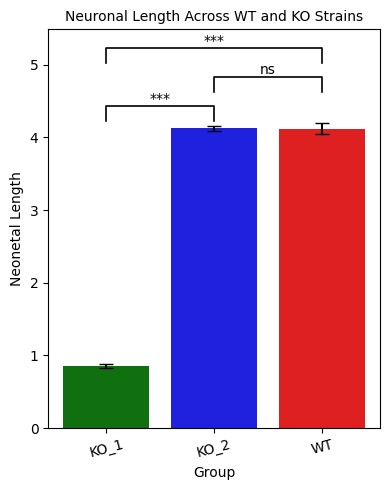

In [46]:
# Step 6. Compute summary stats for plotting
summary = df_long.groupby("Group").agg(mean=("Expression","mean"), sem=("Expression","sem")).reset_index()

# Step 7. Plot mean ± SEM
plt.figure(figsize=(4,5))
sns.barplot(
    data=summary,
    x="Group", y="mean",
    hue="Group", dodge=False, legend=False,
    palette=["Green","Blue","Red"],
    errorbar=None
)

# Add manual SEM bars
x_positions = np.arange(len(summary))
plt.errorbar(
    x=x_positions, y=summary["mean"], yerr=summary["sem"],
    fmt='none', ecolor='black', capsize=5, lw=1.5
)

plt.ylabel("Neonetal Length", fontsize=10)
plt.title("Neuronal Length Across WT and KO Strains", fontsize=10)
plt.xticks(ticks=x_positions, labels=summary["Group"], rotation=15)

# Step 8. Add significance markers ===
# Determine the starting y-position for the significance bars
y_start = summary["mean"].max() + 0.1
h = 0.2

# Map group names to x-positions
group_x = {group: i for i, group in enumerate(summary['Group'])}

# Define the desired order of comparisons for plotting
plotting_order = ["KO_1 vs KO_2", "WT vs KO_2", "WT vs KO_1"]

# Create a dictionary to map comparison strings to their significance data
sig_data = {comp: (pvals_corr[comparisons.index(comp)], reject[comparisons.index(comp)]) for comp in comparisons}

# Iterate through comparisons in the specified plotting order and add significance bars
for i, comp in enumerate(plotting_order):
    p, sig = sig_data[comp]
    group1_name, group2_name = comp.split(" vs ")
    # Get the x-positions for the two groups
    x1, x2 = group_x[group1_name], group_x[group2_name]

    # Calculate the current y-position for the significance bar
    # Adjust the multiplier to control the spacing between bars and order
    current_y = y_start + i * h * 2

    plt.plot([x1, x1, x2, x2], [current_y, current_y+h, current_y+h, current_y], lw=1.2, color='black')

    if p < 0.001:
        stars = "***"
    elif p < 0.01:
        stars = "**"
    elif p < 0.05:
        stars = "*"
    else:
        stars = "ns"
    plt.text((x1 + x2) / 2, current_y+h+.001, stars, ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()